# Лабораторная работа №2

ФИО: Тенчурин Александр Андреевич
Группа: БИВТ-21-4

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [196]:
import pandas as pd
data = pd.read_csv("student-por.csv", sep=',')  # если нужно, можно поменять разделитель
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


## 2. Описание постановки задачи

Описание:

Данные были получены в ходе опроса учащихся, изучающих португальский язык в средней школе. В нем содержится много интересной социальной, гендерной и учебной информации об учениках. Вы можете использовать его для оценки успеваемости или попытаться предсказать итоговую оценку учащихся.

Постановка задачи:

На основе имеющихся данных провести следующие исследования: 
1. Какая самая распространенная олценка ?
2. Можно ли предсказать по каким то факторам итоговую оценку ?
3. Какие основные факторы влияют на результаты тестирования ? 
4. Какие закономерности и взаимодействия в данных вы можете обнаружить ?

Цели:

1. Понимание структуры и характеристик набора данных
2. Выявление аномалий и выбросов
3. Подготовка данных для дальнейших этапов анализа

Независимые переменные:

'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'

Зависимая переменная (Целевое событие):

G3 - Итоговая оценка (final grade (numeric: from 0 to 20, output target))

## 3. Распределение целевой переменной

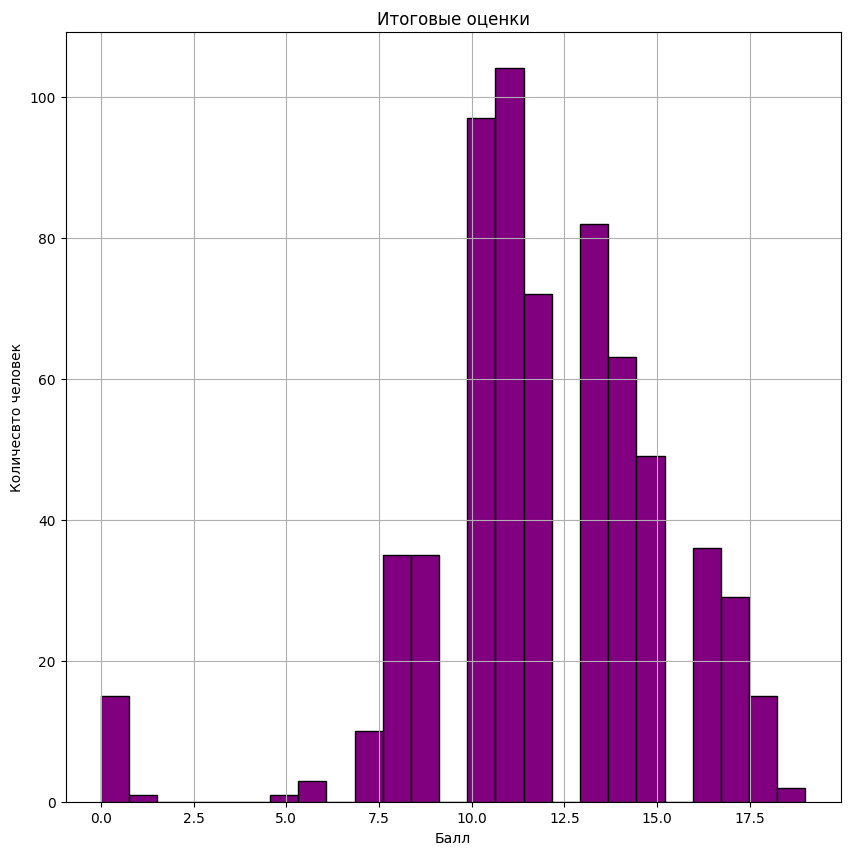

Количество уникальных значений целевой переменной G3: 17
Наиболее часто встречающееся значение: 11 Количество: 104


In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

plt.figure(figsize=(10, 10))
plt.hist(data['G3'], bins=25, color='purple', edgecolor='black')
plt.title('Итоговые оценки')
plt.xlabel('Балл')
plt.ylabel('Количесвто человек')
plt.grid(True)
plt.show()

#Количество уникальных значений целевой переменной
unique_values = data['G3'].nunique()
print("Количество уникальных значений целевой переменной G3:", unique_values)



value_counts = data['G3'].value_counts()
print('Наиболее часто встречающееся значение:', value_counts.idxmax(), 'Количество:', value_counts.max())

На основе анализа выходных данных и графика, можно сделать следующие промежуточные выводы:

1. Целевая переменная G3 имеет 17 уникальных значений.

2. Наиболее часто встречающееся значение G3 - это 11, которое встречается 104 раза.
Также, график “Итоговые оценки” подтверждает эти выводы. 
Он показывает, что оценка 11 встречается чаще всего, что соответствует предоставленной информации. 


## 4. Основные статистики по переменным в датасете

In [198]:
print(data.describe(include='all'))

       school  sex         age address famsize Pstatus        Medu  \
count     649  649  649.000000     649     649     649  649.000000   
unique      2    2         NaN       2       2       2         NaN   
top        GP    F         NaN       U     GT3       T         NaN   
freq      423  383         NaN     452     457     569         NaN   
mean      NaN  NaN   16.744222     NaN     NaN     NaN    2.514638   
std       NaN  NaN    1.218138     NaN     NaN     NaN    1.134552   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    2.000000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000   

              Fedu   Mjob   Fjob  ...      famrel    freetime       goout  \
count   649.000000    649    649  ...  649.000000  649.000000  649.000000   
uniqu

## 5. Основная информация по датасету

In [199]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## 6. Количество пропусков

In [200]:
mis = data.isnull().sum()
print(mis)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


## 7. Гистограммы 5 признаков

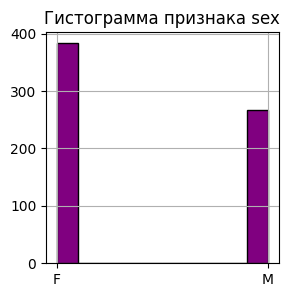

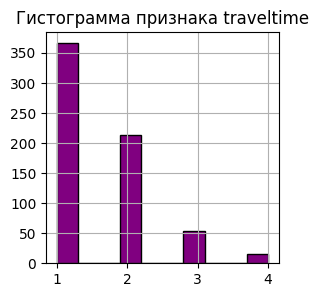

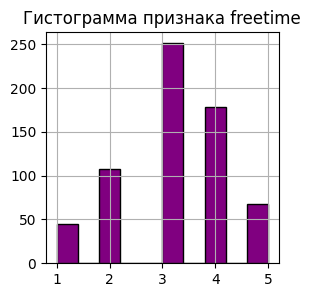

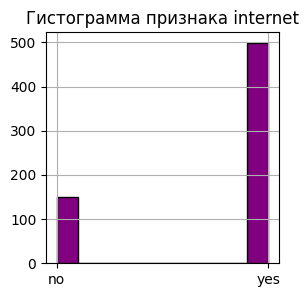

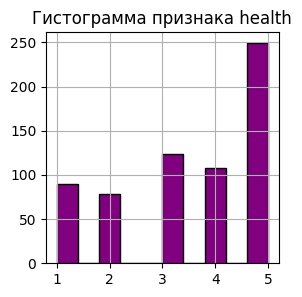

In [201]:
features = ['sex', 'traveltime', 'freetime', 'internet', 'health']

for feature in features:
    plt.figure(figsize=(3,3))
    data[feature].hist(bins=10, color='purple', edgecolor='black')
    plt.title(f'Гистограмма признака {feature}')
    plt.show()

Описание:

1. sex - пол ученика (student's sex (binary: 'F' - female or 'M' - male))
2. traveltime - время до школы (home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour))
3. freetime - свободное время (free time after school (numeric: from 1 - very low to 5 - very high))
4. internet - доступ к интернету (Internet access at home (binary: yes or no))
5. health - здоровье (current health status (numeric: from 1 - very bad to 5 - very good))

## 8. Графики зависимости от целевой

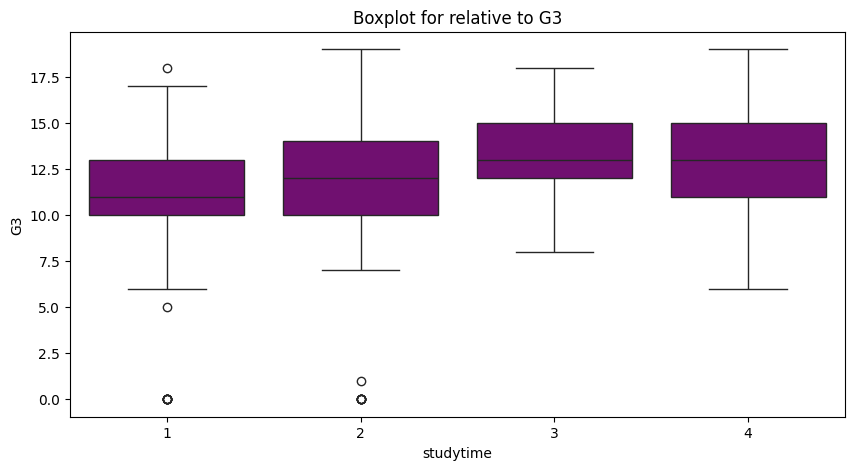

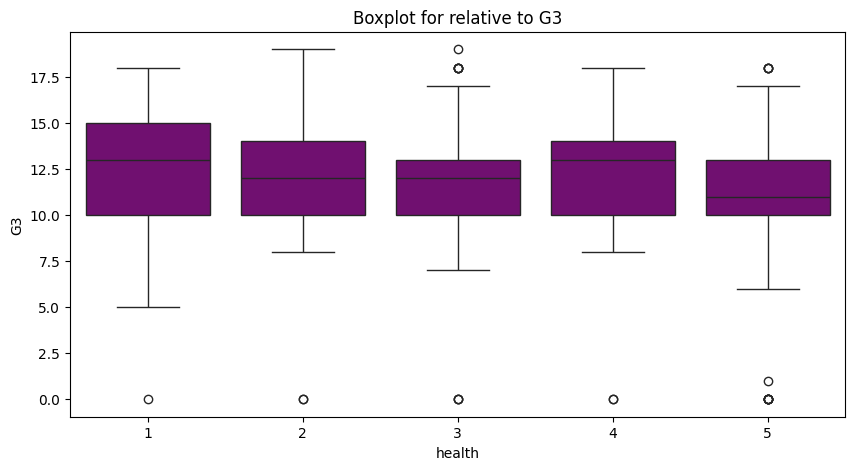

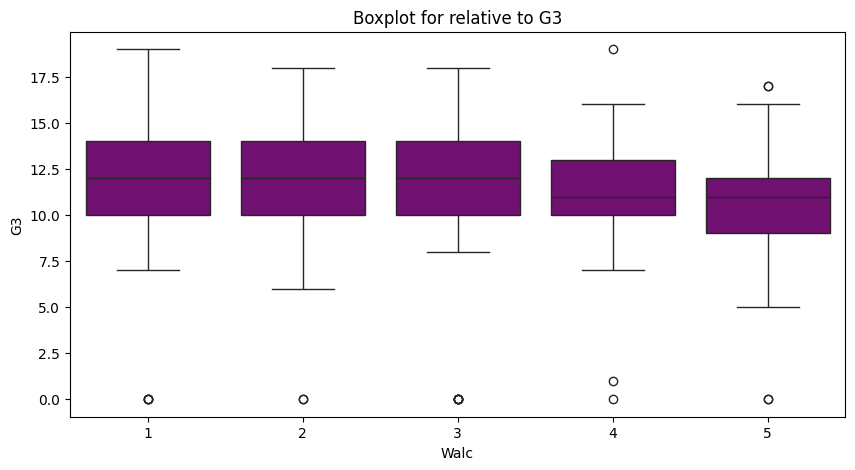

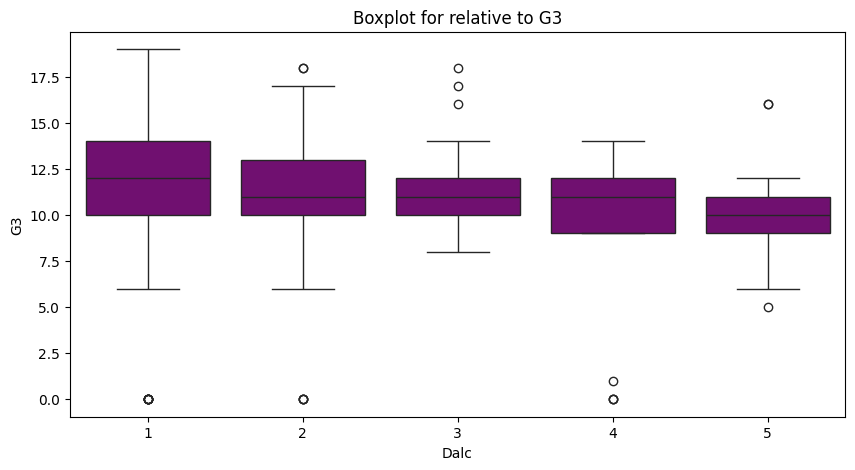

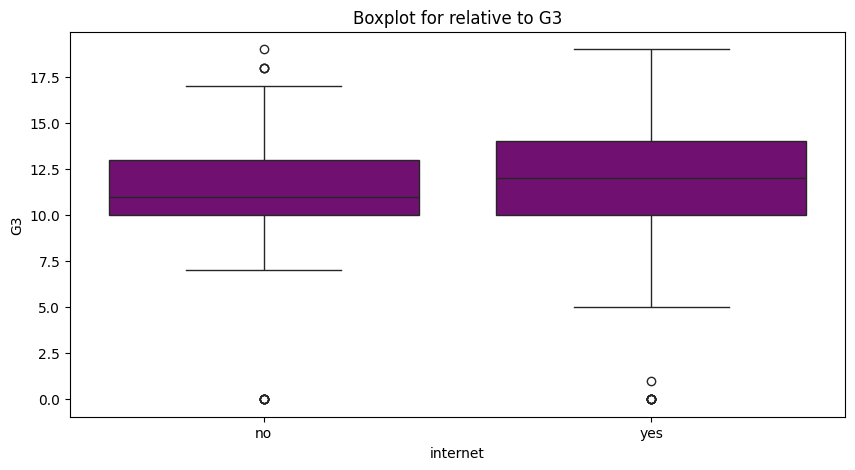

In [202]:
# Выбираем 5 переменных для анализа
selected_features = ['studytime', 'health', 'Walc', 'Dalc', 'internet']

# Построение графиков
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature], y=data['G3'], color='purple')
    plt.title(f'Boxplot for relative to G3')
    plt.show()

Описание:

1. studytime - еженедельное время обучение (weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)). Не особо влияет, однако, те кто учился больше 5 часов(варианты 3 и 4) получили баллы в среднем выше
2. health - Здоровье(current health status (numeric: from 1 - very bad to 5 - very good)) Нельзя предсказать итоговую оценку по показателю
3. Walc - Потербление алкоголя на выходных(weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)) немного влияет, предсказать итоговую оценку не выйдет.
4. Dalc - Потребление алкоголя в рабочие дни(workday alcohol consumption (numeric: from 1 - very low to 5 - very high)) по графику можно сказать что лучше не пить в будние дни потому что ученики выбравшие уровень потребления high and very high(4 и 5) имели результаты хуже. Точно предсказать оценку только по этому признаку не выйдет. 
5. internet - Internet access at home (binary: yes or no) Ученики с инетернетом в среднем имеют оценку выше. 



Ящик с усами(Boxplot) – это визуализация статистических характеристик распределения данных, таких как медиана, квартили и выбросы. Он помогает нам быстро оценить разброс и симметрию данных, а также выявить потенциальные аномалии.